## Машинное обучение, ВМК МГУ

## Практическое задание 2

### Общая информация
Дата выдачи: 7 октября 2020

Максимальная оценка: 10 баллов + 1 бонусный балл

Мягкий дедлайн: 23:59MSK 20 октября

Жесткий дедлайн: 23:59MSK 27 октября.

### О задании

В этом задании вы:
- Познакомитесь с методом решения задачи регрессии на основе метода ближайших соседей.
- Реализуете алгоритм kNN для задачи регрессии.
- Изучите методы работы с категориальными и текстовыми переменными.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл *.ipynb в соответствии со следующим форматом: homework-practice-02-Username.ipynb, где Username — ваша фамилия и имя на латинице именно в таком порядке (например, homework-practice-02-ivanov.ipynb).

Далее отправьте этот файл на anytask в соответсвующий раздел.

In [1]:
import numpy as np
import pandas as pd

Все эксперименты в этой лабораторной работе предлагается проводить на данных соревнования New York City Airbnb Open Data: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data#AB_NYC_2019.csv

В данной задаче предлагается предсказать цену на съем квартиры в зависимости от её параметров.

In [2]:
# data = pd.read_csv('AB_NYC_2019.csv')
data = pd.read_csv('/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
data.shape

(48895, 16)

In [4]:
# число значений у признаков
for col_name in data.columns:
    print(col_name, len(data[col_name].unique()))

id 48895
name 47906
host_id 37457
host_name 11453
neighbourhood_group 5
neighbourhood 221
latitude 19048
longitude 14718
room_type 3
price 674
minimum_nights 109
number_of_reviews 394
last_review 1765
reviews_per_month 938
calculated_host_listings_count 47
availability_365 366


In [5]:
data.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Как видите, в данных есть пропуски. Не забудьте обработать их

In [6]:
missing_cols = ['name', 'host_name', 'last_review', 'reviews_per_month']
data[missing_cols]

,name,host_name,last_review,reviews_per_month
0,Clean & quiet apt home by the park,John,2018-10-19,0.21
1,Skylit Midtown Castle,Jennifer,2019-05-21,0.38
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,NaN,NaN
3,Cozy Entire Floor of Brownstone,LisaRoxanne,2019-07-05,4.64
4,Entire Apt: Spacious Studio/Loft by central park,Laura,2018-11-19,0.10
...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,Sabrina,NaN,NaN
48891,Affordable room in Bushwick/East Williamsburg,Marisol,NaN,NaN
48892,Sunny Studio at Historical Neighborhood,Ilgar & Aysel,NaN,NaN
48893,43rd St. Time Square-cozy single bed,Taz,NaN,NaN


<font color='blue'> Заметим, что `last_review` содержит даты. Тип `object` для их обработки не удобен, так что сразу переведем этот столбец в datetime, который позволяет их сравнивать, вычитать - обрабатывать почти как численные признаки. Дальнейшие преобразования будет зависеть от модели: можно сделать новые признаки с годом, месяцем и днем, можно просто отсчитывать дни.
</font>

In [7]:
data.last_review = pd.to_datetime(data.last_review)

In [8]:
print('Is last_review is missing if and only if reviews_per_month?')
print((data.last_review.isna() == data.reviews_per_month.isna()).all())
print(f'Minimum of reviews_per_month: {data.reviews_per_month.min()}')

Is last_review is missing if and only if reviews_per_month?
True
Minimum of reviews_per_month: 0.01



* <font color=blue>Пропусков в `name` и `host_name` совсем немного — их заполним (аналогично прошлому занятию) пустыми строками.</font>
* <font color=blue>Однако столбцы `last_review` и `reviews_per_month`, во-первых, содержат слишком много пропусков, а, во-вторых, представляют собой соответственно даты и вещественный признак.</font>
* <font color=blue>Как показано выше, пропуск в `last_review` равносилен пропуску в `reviews_per_month`.</font>
* <font color=blue>Также мы обнаружили, что минимальное значение `reviews_per_month` $> 0$ — это позволяет предположить, что пропуски в рассматриваемых колонках связаны с отсутствием отзывов (reviews) вовсе. Поэтому причине разумно заполнить пропуски `reviews_per_month` нулями, а `last_review` достаточно «старой датой», например, годом ранее наименьшей из известных дат.</font>
* <font color=blue>Нельзя утверждать, что вышеприведенные меры — лучшие для обработки пропусков в данной задаче. При необходимости можно посмотреть, какие методы более пригодны, например, по кросс-валидации.</font>
* <font color=blue>Последнее (правда!) замечание по поводу пропусков: часто предобработку правильнее производить после разбиения на обучение и тест (чтобы не было утечек), но в нашем случае единственный использующий информацию о всей выборке параметр — «старая дата», и мы скорее хотим сохранить одинаковое значение такого заполнения для пропущенных дат.</font>

In [9]:
from datetime import timedelta

cat_fills = {
    'name': '',
    'host_name': '',
    'last_review': data.last_review.min() - timedelta(days=365),
    'reviews_per_month': 0, 
}
data.fillna(value=cat_fills, inplace=True)

Разобъем данные на обучение и контроль.

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['price']), data[['price']],
                                                    test_size=0.3, random_state=241)

## Часть 1: Алгоритм kNN в задаче регрессии

<b> 1.1 (1.5 балла) </b>
Реализуйте класс `KNNRegressor`, который используя метод k ближайших соседей решает задачу регрессии. Для решение данной задачи, необходимо найти $N_k$ - k соседей, и после использовать значения их целевых переменных для предсказания:
\begin{align}
y = \frac{1}{k}\sum_{n \in N_k}w_n y_n,
\end{align}

где $w_n$ - вес каждого соседа. 

При этом `KNNRegressor` может работать в 2 режимах:
 - $uniform$ - ближайшие соседи учитываются с одинаковыми весами.
 - $distance$ - вес ближайших соседей зависит от расстояния
 
**Сигнатуру методов, классов, функции при желании можно менять.**

<font color=blue>В следующей ячейке приведены функции, использующиеся для вычисления величин, которые затем будут нужны категориальным метрикам. Для каждого признака формируется свой словарь, который выдает нужную величину по значению категории.</font>

In [11]:
def calc_p2_sum(X):
    """
    Find cumulative sum of p^2-s for each unique value column-wise.
    Parameters:
        X: ndarray
    Returns:
        p2_sum: list of dictionaries, each one represents map for one column
    """
    p2_sum = []
    for cat_col in X.T:
        val, f = np.unique(cat_col, return_counts=True)
        inds = f.argsort()
        p2_sum.append(dict(zip(val[inds], (f[inds]*(f[inds]-1)).cumsum()
                                          / (len(X)*(len(X)-1)))))
    return p2_sum

def calc_log_f(X):
    """
    Find log of (number of occurrences + 1) for each unique value column-wise.
    Parameters:
        X: ndarray
    Returns:
        f: list of dictionaries, each one represents map for one column
    """
    all_f = []
    for cat_col in X.T:
        val, f = np.unique(cat_col, return_counts=True)
        all_f.append(dict(zip(val, np.log(f + 1))))
    return all_f

In [12]:
from typing import Union, Callable, Iterable, Optional
from sklearn.neighbors import NearestNeighbors


class KNNRegressor:
    eps = 10 ** -6  # in case distance is 0

    def __init__(self, n_neighbors: int, metric: Union[str, Callable] = 'euclidean',
                 mode: str = 'uniform', n_jobs: int = -1):
        """
        params:
            n_neighbors: number of neighbors
            metric: metric to use for distance computation
            mode: 'uniform' or 'distance'
            'uniform' - all points in each neighborhood are weighted equally
            'distance' - weight points by the inverse of their distance (+ eps)
            n_jobs — the number of parallel jobs to run for neighbors search
        """
        self._n_neighbors = n_neighbors
        self._metric = metric
        self._mode = mode
        self._n_jobs = n_jobs

    def fit(self, X: np.array, y: np.array, cat_weights=None) -> None:
        """
            X: data
            y: labels
            cat_weights: weights for categorical variables (optional)
        """
        metric_params = {}
        if self._metric == 'flattened_overlap':
            metric_params['p2_sum'] = calc_p2_sum(X)
        elif self._metric == 'log_overlap':
            metric_params['log_f'] = calc_log_f(X)
        if cat_weights is not None:
            metric_params['weights'] = cat_weights
        self._cat_weights = cat_weights
        self._nn = NearestNeighbors(n_neighbors=self._n_neighbors, algorithm='brute',
                                    metric=self._metric, metric_params=metric_params,
                                    n_jobs=self._n_jobs)
        self._nn.fit(X)
        self._y = y  # X is already in __nn._fit_X
        return self

    def _predict_uniform(self, X: np.array, n_neighbors: Optional[int] = None) -> np.array:
        inds = self._nn.kneighbors(X, n_neighbors, return_distance=False)
        return self._y[inds].mean(axis=1)

    def _predict_distance(self, X: np.array, n_neighbors: Optional[int] = None) -> np.array:
        dists, inds = self._nn.kneighbors(X, n_neighbors)
        return np.average(self._y[inds], axis=1, weights=1/(self.eps+dists))

    def predict_ultimate(self, X, k_max, return_weighted=True):
        """
        Make predictions for all k in {1,...,k_max},
        for both modes if return_weighted is True,
        only uniform otherwise.
        """
        if return_weighted == False:
            inds = self._nn.kneighbors(X, k_max, return_distance=False)
            return self._y[inds].cumsum(axis=1) / (np.arange(k_max) + 1)
        ws, inds = self._nn.kneighbors(X, k_max)
        ws = 1/(self.eps+ws)
        uniform_preds = self._y[inds].cumsum(axis=1) / (np.arange(k_max) + 1)
        weighted_preds = (self._y[inds] * ws).cumsum(axis=1) / ws.cumsum(axis=1)
        return uniform_preds, weighted_preds

    def predict(self, X: np.array, n_neighbors: Optional[int] = None) -> np.array:
        """
            X: data
            n_neighbors: number of neighbors
        """
        if self._mode == 'uniform':
            return self._predict_uniform(X, n_neighbors)
        else:
            return self._predict_distance(X, n_neighbors)

<font color=blue>Общие комментарии к реализации:</font>
* <font color=blue>Инициализация NearestNeighbors перенесена в fit, а в качестве алгоритма всегда используется `brute`, т.к. у склерна несколько противоречивая документация о деревьях: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KDTree.html" style="color:red;">здесь</a> говорится, что таже KD-дерево не работает с кастомными метриками, хотя в <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html" style="color:red;">общем классе</a> это допускается.</font>
* <font color=blue>Взвешенный kNN немного модифицирован: чтобы не получать ошибок на нулевом расстоянии, к нему добавляется малое $\varepsilon = 10^{-6}$. </font>
* <font color=blue>Для будущих категориальных метрик не нужно отдельно считать и запоминать величины $p_j$ и $p_j^2$, т.к. они используются только в сглаженном индикаторе и можно сразу предподсчитать кумулятивные суммы. Такой подход позволит вычислять метрику на одном признаке за $O(1)$, не производя одинаковых суммирования повторно. Для log-overlap вместо $f_j$ сразу сохраняются $\log{f_j}$.</font>
* <font color=blue>Параметр `cat_weights`, передающийся в фит, соответствует не весам kNN, а весам, с которыми учитываются отдельные категориальные метрики согласно семинару.</font>
* <font color=blue>Метод `predict_ultimate` эффективно находит предсказания для всех k от 1 до $k_{max}$ (будет использован в одном из следующих заданий).

## Часть 2: Категориальные признаки

<b>2.1 (1 балл)</b>
Реализуйте три функции расстояния на категориальных признаках _(в этом задании только на них!)_ , которые обсуждались на [втором семинаре](https://github.com/mmp-mmro-team/mmp_mmro_fall_2020/blob/master/seminars/sem02_knn.pdf). Не забудьте, что KNNRegressor должен уметь работать с этими функциями расстояния. Как вариант, можно реализовать метрики как [user-defined distance](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html).

<font color=blue>Используем декоратор для более быстрого поиска ближайших соседей, как было предложено Андреем в чате в телеграме:</font>

In [13]:
import sklearn.neighbors
import sklearn.metrics

vbrute = sklearn.neighbors.VALID_METRICS['brute']
vmetrics = sklearn.metrics.pairwise._VALID_METRICS
pairwise = sklearn.metrics.pairwise.PAIRWISE_DISTANCE_FUNCTIONS

def install_metric(f):
    name = f.__name__
    if name not in vbrute:
        vbrute.append(name)
    if name not in vmetrics:
        vmetrics.append(name)
    pairwise[name] = f
    return f

<font color=blue>Теперь реализуем метрики. Также используются две вспомогательные функции, избавляющие от повторов кода: `map_cols` отображает категориальные признаки в величины, требуемые для вычисления метрики (которые были предподсчитаны во время `fit`), а `w_sums` просто суммирует метрики с учетом весов (не связанных с весами kNN), если таковые переданы:</font>

In [14]:
def map_cols(X, maps, default=0, dtype=float):
    """
    Map values of array column-wise.
    Parameters:
        X: ndarray
        maps: list of dictionaries
        default: numeric
        dtype: data-type or str
    Returns:
        X_mapped: ndarray with the same shape as X
    """
    X_mapped = np.empty_like(X, dtype=dtype)
    for i, col in enumerate(X.T):
        X_mapped[:, i] = np.vectorize(lambda x: maps[i].get(x, default))(col)
    return X_mapped

def w_sum(A, weights=None):
    """
    Compute weighted sum A elements over the last axis.
    Parameters:
        A: ndarray
        weights: array of length euqal to the size of the last dimenstion of A
    Returns:
        sum: ndarray of shape A.shape[:-1]
    """
    if weights is None:
        return A.sum(axis=-1)
    else:
        return A.dot(weights)

@install_metric
def overlap(X, Z, weights=None):
    return w_sum((X[:, np.newaxis] != Z), weights)

@install_metric
def flattened_overlap(X, Z, p2_sum, weights=None):
    return w_sum((X[:, np.newaxis] != Z) + (X[:, np.newaxis] == Z) * map_cols(Z, p2_sum), weights)

@install_metric
def log_overlap(X, Z, log_f, weights=None):
    return w_sum(((X[:, np.newaxis] != Z) * map_cols(X, log_f)[:, np.newaxis] * map_cols(Z, log_f)),
                 weights)

In [15]:
# TESTS

# A = np.array([
#     ['A', '1', 'MIPT'],
#     ['A', '4', 'MIPT'],
#     ['B', '3', 'Vyshka'],
#     ['B', '2', 'MSU'],
#     ['A', '5', 'MSU'],
# ], dtype=str)

# B = np.array([
#     ['A', '1', 'MIPT'],
#     ['-', '-', '-'],
#     ['C', '1', 'MSU'],
#     ['A', '2', 'GBPOU MO "Balashikha technical school'],
# ])

# overlap(A, B)
# p2_sum = calc_p2_sum(A)
# flattened_overlap(A, B, p2_sum)
# log_f = calc_log_f(A)
# log_overlap(A, B, log_f)

<b>2.2 (1 балл)</b> Найдите все категориальные признаки в данных. Подсчитайте для каждой из метрик качество на тестовой выборке `X_test` при числе соседей $k = 10$. Качество измеряйте с помощью RMSE.

Какая функция расстояния оказалась лучшей? Почему?

<font color=blue>Разберемся, какие признаки в данной задаче будем рассмаривать как категориальные.</font>

In [16]:
un_dt = ['dtype', 'n_unique']
print('Распределение типов и уникальных значений:')
pd.DataFrame([data.dtypes, data.nunique()], index=un_dt).drop(columns='price').T.sort_values(by=un_dt)

Распределение типов и уникальных значений:


,dtype,n_unique
calculated_host_listings_count,int64,47
minimum_nights,int64,109
availability_365,int64,366
number_of_reviews,int64,394
host_id,int64,37457
id,int64,48895
reviews_per_month,float64,938
longitude,float64,14718
latitude,float64,19048
last_review,datetime64[ns],1765


In [17]:
print('Что представляют собой признаки в строковом типе:')
data[data.columns[data.dtypes == 'object']].head()

Что представляют собой признаки в строковом типе:


,name,host_name,neighbourhood_group,neighbourhood,room_type
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,Private room
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,Entire home/apt
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,Private room
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,Entire home/apt


In [18]:
num_features = ['calculated_host_listings_count', 'minimum_nights', 'availability_365',
                'number_of_reviews', 'reviews_per_month', 'longitude', 'latitude']
cat_features = ['room_type', 'neighbourhood_group', 'neighbourhood', 'host_id']
text_features = ['name']
other_features = ['last_review']
drop_features = ['id', 'host_name']

### <font color=blue>Какие выводы можно сделать о признаках и их типах уже сейчас?</font>
#### <font color=blue>Некатегориальные:</font>
* <font color=blue>Все числовые признаки, записанные в переменную `num_features` действительно могут рассматриваться как вещественные (целочисленные) переменные с разумным отношением порядка.</font>
* <font color=blue>В `text_features` записан единственный признак `name`, содержащий, по-видимому описание квартир. В качестве категории его брать бессмысленно, так как все строки уникальны.</font>
* <font color=blue>`id` — по-видимому, уникальный идентификатор, в качестве признака его брать бессмысленно.</font>
* <font color=blue>Из `last_review` (даты) можно будет извлечь числовые признак(и).</font>
* <font color=blue>`host_name` не информативен, за исключением совпадения владельцев квартир. Но эта информация содержится в `host_id`.</font>

#### <font color=blue>Категориальные:</font>

* <font color=blue>`room_type` (тип комнаты), `neighbourhood_group` (боро — административная единица Нью-Йорка), `neighbourhood` (район) — по смыслу означают соответствующие категории, а также формально их можно сравнить только на равенство, а число уникальных значений не величко — данные признаки однозначно категориальные.</font>
* <font color=blue>Признак `host_id` (номер владельца) — тоже разбивает данные на категории (по владельцам — это полезная информация) и эти номера можно сравнивать только на равенство. Проблема может возникнуть в том, что уникальных значений у этого признака достаточно много, что делает менее эффективным работу с ним как с категориальным. Спойлер: как мы дальше покажем, скорость работы почти не замедлится, а вот качество улучшится. В следующей клетке небольшая иллюстрация того факта, что у одного и того же владельца квартиры имеют «похожие» цены, но близость `host_id` у разных владельцев не позволяет сделать выводов о цене.
</font>

In [19]:
data[(data.host_id == 12220) | (data.host_id == 12221)][['host_id', 'price']]

,host_id,price
557,12221,50
610,12221,50
6785,12220,90
42981,12220,228
42982,12220,236


In [20]:
from sklearn.preprocessing import OrdinalEncoder

# sklearn.neighbors.NearestNeighbors не допускает даже хранение строк,
# так что придется закодировать
enc = OrdinalEncoder(dtype=np.int)
enc.fit(np.concatenate([X_train[cat_features], X_test[cat_features]]))
X_train_cat = enc.transform(X_train[cat_features])
X_test_cat = enc.transform(X_test[cat_features])
y_train_np = y_train.to_numpy().ravel()
y_test_np = y_test.to_numpy().ravel()

<font color=blue>Рассмотрим как обычный kNN, так и учитывающий зависимость от расстояний.</font>

In [21]:
from time import time

def rmse(y_test, y_pred):
    return np.linalg.norm(y_test - y_pred, axis=-1) / np.sqrt(len(y_test))

modes = ['uniform', 'distance']
metrics = ['overlap', 'flattened_overlap', 'log_overlap']
results = pd.DataFrame(columns=['RMSE', 'time'], 
                       index=pd.MultiIndex.from_product([modes, metrics], names=['mode', 'metric']))
print('Results for all categorical features:')
for mode in modes:
    for metric in metrics:
        model = KNNRegressor(n_neighbors=10, metric=metric, mode=mode)
        model.fit(X_train_cat, y_train_np)
        start = time()
        y_pred = model.predict(X_test_cat)
        finish = time()
        results.loc[mode, metric]['RMSE'] = rmse(y_test_np, y_pred)
        results.loc[mode, metric]['time'] = finish - start

results.style.highlight_min(subset='RMSE')

Results for all categorical features:


<font color=blue>Теперь попробуем убрать `host_id`:</font>

In [22]:
print('Results for categorical features without host_id:')
for mode in modes:
    for metric in metrics:
        model = KNNRegressor(n_neighbors=10, metric=metric, mode=mode)
        model.fit(X_train_cat[:, :3], y_train_np)
        start = time()
        y_pred = model.predict(X_test_cat[:, :3])
        finish = time()
        results.loc[mode, metric]['RMSE'] = rmse(y_test_np, y_pred)
        results.loc[mode, metric]['time'] = finish - start

results.style.highlight_min(subset='RMSE')

Results for categorical features without host_id:


* <font color=blue>Мы показали, с `host_id` ошибка меньше, а скорость работы меняется незначительно. </font>
* <font color=blue>Во всех случаях минимальная ошибка получается у метрики `flattened_overlap`. Причина может быть в том, что признаки распределены неравномерно, и: 
    1. Совпадение в популярных значениях категории (например, почти половина всех квартир расположены в Манхэттене) не столь важно, поскольку встречается часто. 
    2. Информация о более редких значениях представляет большую ценность (например, менее популярные районы).</font>

<b>2.3 (1 балл) бонус</b> Подберите лучшее (на тестовой выборке) число соседей $k$ для каждой из функций расстояния. Какого удалось достичь уровня качества?

<font color=blue>Заметим (на волне домашней работы по практикуму), что в данной задаче эффективно найти матрицу с максимально интересующим нас числом $k_{max}$ ближайших соседей, а затем по ней сразу кумулятивно посчитать средние (а заодно и взвешенные). Необходимый функционал реализован в методе `predict_ultimate` нашего регрессора.</font> 

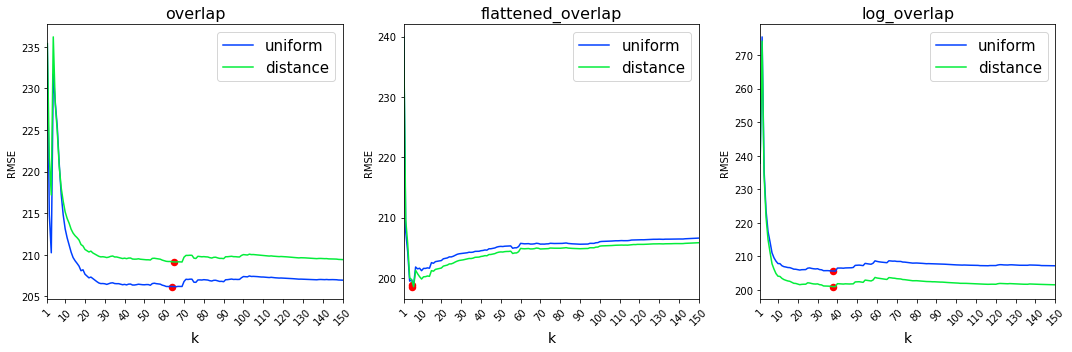

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use(['seaborn-bright'])

def ultimate_rmse(y_true, Y_preds):
    Y_preds - y_true

k_max = 150

plt.figure(figsize=(15, 5))
results = pd.DataFrame(columns=['best k', 'RMSE'], 
                       index=pd.MultiIndex.from_product([modes, metrics], names=['mode', 'metric']))

for i, metric in enumerate(metrics):
    model = KNNRegressor(n_neighbors=k_max, metric=metric)
    model.fit(X_train_cat, y_train_np)
    plt.subplot(1, 3, i + 1)
    plt.xlim(1, k_max)
    plt.xticks([1] + list(range(10, k_max+1,10)), rotation=45)
    plt.ylabel('RMSE')
    plt.xlabel('k', fontsize=14)
    plt.title(metric, fontsize=16)
    for Y_pred, mode in zip(model.predict_ultimate(X_test_cat, k_max), modes):
        rmses = rmse(y_test_np, Y_pred.T)
        kb = rmses.argmin()
#         print(f'{mode} {metric} {kb + 1} {rmses[kb]:.2f}')
        plt.plot(np.arange(k_max) + 1, rmses)
        plt.scatter(kb, rmses[kb], c='r', lw=1.5)
        results.loc[mode, metric]['best k'] = kb + 1
        results.loc[mode, metric]['RMSE'] = rmses[kb]
    plt.legend(modes, fontsize=15)
plt.tight_layout()

In [24]:
results.style.highlight_min(subset='RMSE')

<font color=blue>В таблице выше для разных метрик приведены наименьшее значения RMSE и оптимальное число соседей, на котором оно достигается. Проверены оба варианта $kNN$ — как взешенный, так и равномерный. Зависимость функции потерь от числа соседей проиллюстрирована на графиках.</font>

<b>2.4 (2.5 балла)</b> Отойдем ненадолго от задачи регрессии и перейдём к задаче классификации: будем определять, являеться ли квартира дорогой $(target = 1)$ или дешевой $(target = 0)$. Будем считать дорогими квариры, цена которых выше среднего.

In [25]:
data['target'] = (data.price > data.price.mean()).astype(int)

Реализуйте счетчики, которые заменят категориальные признаки на вещественные.

А именно, для каждого категориального признака $f_j(x)$ необходимо сделать следующее:
1. Число `counts` объектов в обучающей выборке с таким же значением признака.
\begin{align}
counts_j(c) = \sum_{i=1}^l [f_j(x_i) = c]
\end{align}
2. Число `successes` объектов первого класса ($y = 1$) в обучающей выборке с таким же значением признака.
\begin{align}
successes_j(c) = \sum_{i=1}^l[f_j(x_i) = c][y_i = +1].
\end{align}
3. Сглаженное отношение двух предыдущих величин:
\begin{align}
p_j(c) = \frac{successes_j(c) + a}{counts_j(c) + b},
\end{align}

где $a$ и $b$ - априорные счетчики (например, a = 1, b = 2).

* <font color=blue>В функции трансформации будем передавать не отдельную колонку, а сразу X_train и X_test, которые нужно преобразовать.</font>
* <font color=blue>Будем использовать реализованную выше функцю map_col.</font>

In [26]:
def counts(X_train, X_test, map_train=False):
    """
    Parameters:
        X_train : ndarray of shape (n_rows_1, n_cols)
        X_test : ndarray of shape (n_rows_2, n_cols)
        map_train : bool
    Returns:
        X_train_mapped : ndarray of shape (n_rows_1, n_cols), if map_train is True
        X_test_mapped : ndarray of shape (n_rows_2, n_cols)
    """
    maps = [dict(zip(*np.unique(x, return_counts=True))) for x in X_train.T]
    if map_train:
        return map_cols(X_train, maps, dtype=int), map_cols(X_test, maps, dtype=int)
    else:
        return map_cols(X_test, maps, dtype=int)

def successes(X_train, X_test, y_train, map_train=False):
    """
    Parameters:
        X_train : ndarray of shape (n_rows_1, n_cols)
        X_test : ndarray of shape (n_rows_2, n_cols)
        y_train : array of size n_rows_1
        map_train : bool
    Returns:
        X_train_mapped : ndarray of shape (n_rows_1, n_cols), if map_train is True
        X_test_mapped : ndarray of shape (n_rows_2, n_cols)
    """
    maps = [dict(zip(*np.unique(x, return_counts=True))) for x in X_train[y_train == 1].T]
    if map_train:
        return map_cols(X_train, maps, dtype=int), map_cols(X_test, maps, dtype=int)
    else:
        return map_cols(X_test, maps, dtype=int)

def smoothed_counts(X_train, X_test, y_train, a=1, b=2, map_train=False):
    """
    Parameters:
        X_train : ndarray of shape (n_rows_1, n_cols)
        X_test : ndarray of shape (n_rows_2, n_cols)
        y_train : array of size n_rows_1
        a : int
        b : int
        map_train : bool
    Returns:
        X_train_mapped : ndarray of shape (n_rows_1, n_cols), if map_train is Trie
        X_test_mapped : ndarray of shape (n_rows_2, n_cols)
    """
    if map_train:
        return tuple((s + a) / (c + b) for s, c in zip(successes(X_train, X_test, y_train, map_train=True),
                                                       counts(X_train, X_test, map_train=True)))
    else:
        return ((successes(X_train, X_test, y_train) + a) 
                / (counts(X_train, X_test) + b))

Поскольку признаки, содержащие информацию о целевой переменной, могут привести к переобучению, может оказаться полезным сделать *фолдинг*: разбить обучающую выборку на $n$ частей, и для $i$-й части считать `counts` и `successes` по всем остальным частям. Для тестовой выборки используются счетчики, посчитанный по всей обучающей выборке. Реализуйте и такой вариант. Достаточно взять $n = 3$.

<font color=blue>Напишем функцию-обертку `fold_wrap`, чтобы не писать реализовывать счетчики заново.</font>

In [27]:
from functools import partial
from sklearn.model_selection import KFold

def fold_transform(transformer, n_folds, X_train, X_test, *args, **kwargs):
    """
    Parameters:
        transformer : transformation function
        n_folds : int
        X_train : ndarray of shape (n_rows_1, n_cols)
        X_test : ndarray of shape (n_rows_2, n_cols)
        args, kwargs : additional arguments for transformer
    Returns:
        X_train_mapped : ndarray of shape (n_rows_1, n_cols)
        X_test_mapped : ndarray of shape (n_rows_2, n_cols)
    """
    if n_folds > 1:
        kf = KFold(n_splits=n_folds)
        Xtr_mapped_list = []
        for train_idx, test_idx in kf.split(X_train):
            if args:
                Xtr_mapped_list.append(transformer(X_train[train_idx], X_train[test_idx], 
                                                   args[0][train_idx], **kwargs))
            else:
                Xtr_mapped_list.append(transformer(X_train[train_idx], X_train[test_idx],
                                                   *args, **kwargs))
        return np.concatenate(Xtr_mapped_list), transformer(X_train, X_test, *args, **kwargs)
    elif n_folds == 1:
        kwargs['map_train'] = True
        return transformer(X_train, X_test, *args, **kwargs)
    else:
        raise ValueError

# categorical transformations
ct = {
    'counts': counts,
    'successes': successes,
    'smoothed_counts': smoothed_counts,
}

def cat_transform(name, X_train, X_test, y_train=None, n_folds=1, **kwargs):
    if name == 'counts':
        return fold_transform(ct['counts'], n_folds, X_train, X_test, **kwargs)
    else:
        return fold_transform(ct[name], n_folds, X_train, X_test, y_train, **kwargs)

In [28]:
# кодирование host_id в этом и следующем задании не имеет смысла
# используем категориальные признаки с не столь большим разбросом уникальных значений
cat_features = ['room_type', 'neighbourhood_group', 'neighbourhood']
X_train_cat = X_train[cat_features].to_numpy()
X_test_cat = X_test[cat_features].to_numpy()
y_train_class = data.target.loc[y_train.index].to_numpy()
y_test_class = data.target.loc[y_test.index].to_numpy()

Посчитайте на тесте AUC-ROC метода $k$ ближайших соседей с евклидовой метрикой для выборки, где категориальные признаки заменены на счетчики. Сравните по AUC-ROC два варианта формирования выборки — с фолдингом и без. Не забудьте подобрать наилучшее число соседей $k$.

In [29]:
from sklearn.metrics import roc_auc_score as auc
from sklearn.neighbors import KNeighborsClassifier

train_cat = [X_train_cat, X_test_cat, y_train_class]

foldings = ['-', '+']
idx = pd.MultiIndex.from_product([list(ct.keys()) + ['all'], foldings],
                                 names=['transform', 'folding'])
ks = np.arange(1, 101)
df = pd.DataFrame(index=ks, columns=idx, dtype=float)

Xtr_all = {'-': [], '+': []}
Xts_all = {'-': [], '+': []}

for name in ct:
    for n_folds, folding in zip([1, 3], foldings):
#         print(name, folding)
        Xtr, Xts = cat_transform(name, *train_cat, n_folds=n_folds)
        for k in ks:
            model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
            model.fit(Xtr, y_train_class)
            y_pred_class = model.predict(Xts)
            df.loc[k, (name, folding)] = auc(y_test_class, y_pred_class)
        print(folding)
        Xtr_all[folding].append(Xtr)
        Xts_all[folding].append(Xts)
        
for folding in foldings:
    print(folding)
    for k in ks:
        Xtr = np.concatenate(Xtr_all[folding], axis=1)
        Xts = np.concatenate(Xts_all[folding], axis=1)
        model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
        model.fit(Xtr, y_train_class)
        y_pred_class = model.predict(Xts)
        df.loc[k, ('all', folding)] = auc(y_test_class, y_pred_class)

# фух, вычислили!

-
+
-
+
-
+
-
+


<font color=blue>Ниже приведены измерений для минимальных и максимальных $k$, с точностью до трех знаков после запятой. `counts`, `successes`, `smoothed_counts` соответствуют типам счетчиков, которым заменяются категориальные призныки. В `all` использованы сразу все преобразования. `-` и `+` в `folding`'е соответствуют преобразованиям на всем трейне (`-`) и с разбиениями по условию, т.е. с фолдингом (`+`):</font>

In [30]:
df.iloc[np.r_[0:5, -5:0]].style.format('{:.3f}')

<font color=blue>Как видим, результаты получились разными в зависимости от преобразования. Тажке нельзя утверждать, что фолдинг срабатывает лучше или хуже сразу для всех счетчиков — на этот фактор влияет и число соседей. Для обычных счетчиков и «успехов» чаще выигрывает вариант без фолдинга, для сглаженных — в особенности при больших $k$ — с фолдингом качество выше. При объединении всех преобразований результат снова зависит от $k$.</font>

<font color=blue>Ниже приведены наилучшие результаты для всех вариантов: фолдинг положительно влияет при использовании сразу всех трансформаций, тем не менее науилучшим вариантом в данной задаче оказалось преобразование `successes`, проведенное без фолдинга.</font>

In [31]:
pd.concat([df.idxmax().rename('best k'), df.max().rename('ROC AUC')], axis=1).style.highlight_max(subset=['ROC AUC'])

<b>2.5 (1 балл)</b> Вернемся к задаче регрессии. Утверждается, что для задачи регрессии можно также сделать преобразование категориальных признаков в действительные числа. Для этого достаточно для каждого значения признака $f_j$ вычислить:
\begin{align}
p_j(c) = g(T_i | f_j(x_i) = c),
\end{align}

где $T_i$ - значения целевой переменной объекта $x_i$. Функция $g$ - среднее (mean) или среднеквадратичное отклонение (std).

Закодируйте категориальные признаки обоими способами и найдите значение RMSE. Используйте евклидову метрику для поиска ближайших соседей. Для какой функции $g$ значение RMSE лучше? Почему?

<font color=blue>А в этой задаче для разнообразия проведем преобразование с помощью инструментов Pandas. В случае отсутствия категории (например, такие случаи есть в `neighbourhood`) из тестовой выборки в трейне возьмем среднее и стандартное отклонение по всем ценам трейна.</font>

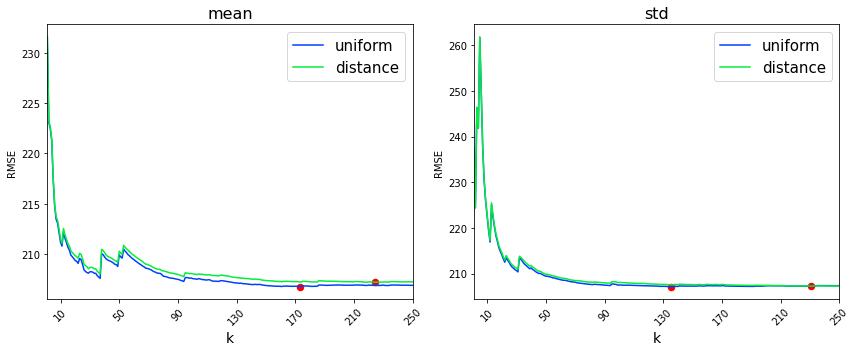

In [32]:
maps_mean = {feature: y_train.groupby(X_train[feature]).mean().to_dict()['price']
             for feature in cat_features}
maps_std = {feature: y_train.groupby(X_train[feature]).std().to_dict()['price']
            for feature in cat_features}
num_transforms = ['mean', 'std']

results = pd.DataFrame(columns=['best k', 'RMSE'], 
                       index=pd.MultiIndex.from_product([modes, num_transforms], names=['mode', 'transformation']))
k_max = 250
plt.figure(figsize=(12, 5))

for i, (name, d) in enumerate(zip(num_transforms, [maps_mean, maps_std])):
    val = getattr(y_train.price, name)()
    X_train_tonum = pd.concat([X_train[feature].map(d[feature])
                               for feature in d], axis=1).fillna(val)
    X_test_tonum = pd.concat([X_test[feature].map(d[feature]) 
                              for feature in d], axis=1).fillna(val)
    model = KNNRegressor(n_neighbors=k_max)
    model.fit(X_train_tonum.to_numpy(), y_train_np)
    plt.subplot(1, 2, i + 1)
    plt.xlim(1, k_max)
    plt.xticks(list(range(10, k_max+1,40)), rotation=45)
    plt.ylabel('RMSE')
    plt.xlabel('k', fontsize=14)
    plt.title(name, fontsize=16)
    for Y_pred, mode in zip(model.predict_ultimate(X_test_tonum.to_numpy(), k_max), modes):
        rmses = rmse(y_test_np, Y_pred.T)
        kb = rmses.argmin()
        plt.plot(np.arange(k_max) + 1, rmses)
        plt.scatter(kb, rmses[kb], c='r', lw=1.5)
        results.loc[mode, name]['best k'] = kb + 1
        results.loc[mode, name]['RMSE'] = rmses[kb]
    plt.legend(modes, fontsize=15)
plt.tight_layout()

In [33]:
results

best k     RMSE
mode     transformation                
uniform  mean              174  206.763
         std               136  207.106
distance mean              225  207.208
         std               232  207.239

<font color=blue>Замена значений на средние показатели дает в незначительной мере лучший результат, чем использование стандартных отколнений.</font>
    
<font color=blue>Возможно, «соседство» по средней стоимости квартиры содержит больше информации, нежели близость в отклонении от среднего, ведь стандартное отклонение в цене может быть близким у нескольких квартир совершенно разного класса.</font>

## Часть 3: Текстовые признаки

<b>3.1 (2 балла)</b> Перейдем от категориальным признаков к текстовым. Рассмотрим 2 способа преобразования текста в действительные числа:
- Мешок слов (Bag of Words)
- TF-IDF

[Здесь](https://scikit-learn.org/stable/modules/feature_extraction.html) вы можете прочитать про их применение в Питоне.

Сравните оба способа на задаче регресси. Какую лучше метрику использовать: евклидову или косинусную меру? Постройте графики зависимости качества решения задачи от способа преобразования, метрики и количества соседей. Мера качества - RMSE.

Объясните полученные результаты.

Перед преобразованием не забудьте уменьшить размер словаря. Например, это можно сделать за счет приведения всех слов к одному регистру и удаления [стопслов](https://en.wikipedia.org/wiki/Stop_words) (артиклей, предлогов, союзов). Можно использовать использовать, например, библиотеку nltk.

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.corpus import stopwords

kwargs = {
    'lowercase': True,
    'stop_words': stopwords.words('english'),
}

vectorizer = CountVectorizer(**kwargs)
tfidfer = TfidfTransformer()

tfidfer.fit(vectorizer.fit_transform(data['name'].to_numpy()))

X_train_vct = vectorizer.transform(X_train.name.to_numpy())
X_test_vct = vectorizer.transform(X_test.name.to_numpy())

X_train_ti = tfidfer.transform(X_train_vct)
X_test_ti = tfidfer.transform(X_test_vct)

<font color=blue>Поскольку в задании требуется исследовать зависимость от способа преобразования, метрики и числа соседей, не будем перегружать еще и взешенным/невзвешенным kNN, а учтем соседей равномерно. Подписи на графиках отражают их смысл, но на всякий случай дополнительно прокомментируем:</font>
* <font color=blue>Оси всех графиках, как и в предыдущех заданиях, отвечают числу соседей и RMSE. Таким образом, кривая показывает зависимость ошибки от числа соседей</font>
* <font color=blue>Построены графики попарных сравнений способов преобразований при фиксированных метриках (верхний ряд) и метрик при фиксированных способах преобразования (нижний ряд)</font>
* <font color=blue>Красной точкой отмечен минимум</font>

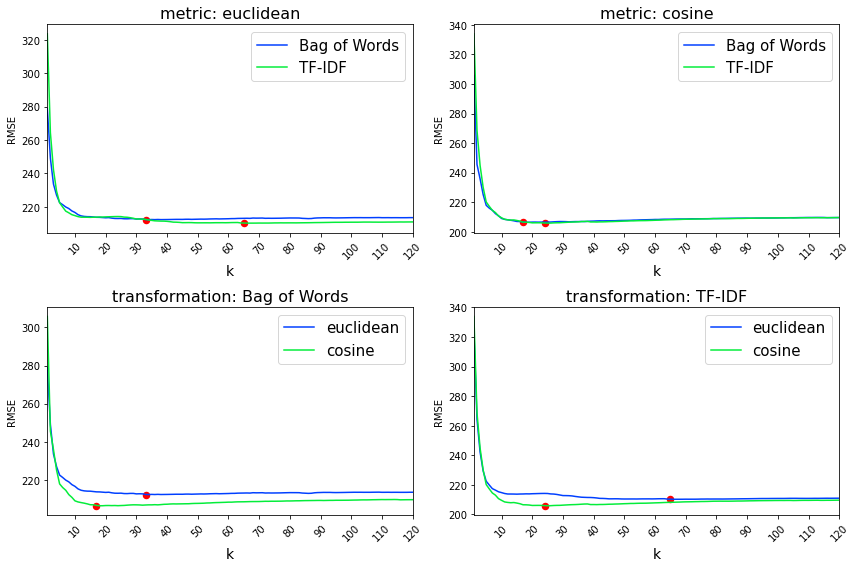

In [35]:
transforms = ['Bag of Words', 'TF-IDF']
metrics = ['euclidean', 'cosine']
names = ['transformation', 'metric']

results = pd.DataFrame(columns=['best k', 'RMSE'], 
                       index=pd.MultiIndex.from_product([transforms, metrics], names=names))

k_max = 120
fig, ax = plt.subplots(2, 2, figsize=(12, 8))


for i, metric in enumerate(metrics):
    model = KNNRegressor(n_neighbors=k_max, metric=metric, n_jobs=4)
    
    model.fit(X_train_vct, y_train_np)
    Y_pred = model.predict_ultimate(X_test_vct, k_max, return_weighted=False)
    rmses = rmse(y_test_np, Y_pred.T)
    kb = rmses.argmin()
    results.loc['Bag of Words', metric]['best k'] = kb + 1
    results.loc['Bag of Words', metric]['RMSE'] = rmses[kb]
    
    ax[0, i].plot(np.arange(k_max) + 1, rmses, label='Bag of Words')
    ax[0, i].scatter(kb, rmses[kb], c='r', lw=1.5, label=None)
    ax[1, 0].plot(np.arange(k_max) + 1, rmses, label=metric)
    ax[1, 0].scatter(kb, rmses[kb], c='r', lw=1.5, label=None)
    
    model.fit(X_train_ti, y_train_np)
    Y_pred = model.predict_ultimate(X_test_ti, k_max, return_weighted=False)
    rmses = rmse(y_test_np, Y_pred.T)
    kb = rmses.argmin()
    results.loc['TF-IDF', metric]['best k'] = kb + 1
    results.loc['TF-IDF', metric]['RMSE'] = rmses[kb]
    
    ax[0, i].plot(np.arange(k_max) + 1, rmses, label='TF-IDF')
    ax[0, i].scatter(kb, rmses[kb], c='r', lw=1.5, label=None)
    ax[1, 1].plot(np.arange(k_max) + 1, rmses, label=metric)
    ax[1, 1].scatter(kb, rmses[kb], c='r', lw=1.5, label=None)

for i, metric in enumerate(metrics):
    ax[0, i].set_title(f'metric: {metric}', fontsize=16)
for j, transform in enumerate(transforms):
    ax[1, j].set_title(f'transformation: {transform}', fontsize=16)

for i in range(2):
    for j in range(2):
        ax[i, j].legend(fontsize=15)
        ax[i, j].set_xlim(1, k_max)
        ax[i, j].set_xticks(list(range(10, k_max+1,10)))
        ax[i, j].set_xticklabels(list(range(10, k_max+1,10)), rotation=45)
        ax[i, j].set_xlabel('k', fontsize=14)
        ax[i, j].set_ylabel('RMSE')

plt.tight_layout()

In [36]:
results.style.highlight_min(subset='RMSE')

<font color=blue> Как видим из результатов в таблице и на графиках, с TF-IDF качество получается лучше. При обоих вариантах преобразований (нижний ряд) лучшей метрикой оказывается косинусная. Более того, ее вклад имеет большую значимость, чем выбор между Bag of Words и TF-IDF (левый верхний график). Косинусная метрика может двавать лучшие результаты по сравнению с евклидовой, потому что не при ее вычислении векторы фактически нормируются, что важно при оценке близости закодированных текстов разной длины. Интересно, что это сработало даже в случае, когда все тексты достаточно короткие.</font>

In [37]:
print(f"min length: {data.iloc[5337]['name']}")
print(f"max length: {data.iloc[25832]['name']}")

min length: L
max length: The printing studio bedroom with garden in Bedstuy  !!Brooklyn. Historic neighborhood close to everything ! Full kitchen bathroom BBQ and porch at your disposal. Learn to print !!


<font color=blue>К сожалению, пример короткого (не считаем пустые) названия скорее иллюстрирует наличие выбросов...</font>

<b>3.2 (1 балл)</b> Используя все доступные признаки, решите задачу регрессии. Для категориальных и текстовых признаков выберите лучшие преобразования (из сделанных раннее заданий). Повлияло ли добавление количественного признака на метрику качества?

* <font color=blue>`id` и `name` убираем из датасета в силу неинформативности.</font>
* <font color=blue>`room_type`, `neighbourhood_group`, `neighbourhood` заменим, как в одном из заданий выше, условными средними цены в обучении.</font>
* <font color=blue>`last_review` попробуем заменить на число дней, прошедших с наиболее ранней. (После обработки пропусков).</font>
* <font color=blue>Остальные вещественные признаки можем взять как есть.</font>
* <font color=blue>Ограничим число признаков, порожденных текстовыми, чтобы объеденить разреженный и обычный массивы.</font>

In [38]:
vectorizer = CountVectorizer(max_features=200, **kwargs)
tfidfer = TfidfTransformer()
tfidfer.fit(vectorizer.fit_transform(data['name'].to_numpy()))

if 'host_id' not in num_features:
    num_features.append('host_id')

def last_trans(X):
    X_days = (X.last_review - data.last_review.min()).dt.days.to_numpy()[:, np.newaxis]
    mean = y_train_np.mean()
    X_cat = pd.concat([X[feature].map(maps_mean[feature]) 
                       for feature in maps_mean], axis=1).fillna(mean).to_numpy()
    X_txt = tfidfer.transform(vectorizer.transform(X.name.to_numpy())).toarray()
    X_num = X[num_features].to_numpy()
    return np.concatenate([X_num, X_days, X_cat, X_txt], axis=1)

X_train_new = last_trans(X_train)
X_test_new = last_trans(X_test)

k_max = 150

results = pd.DataFrame(columns=['best k', 'RMSE'], 
                       index=pd.MultiIndex.from_product([modes, metrics],
                                                         names=['mode', 'metric']))

for i, metric in enumerate(metrics):
    model = KNNRegressor(n_neighbors=k_max, metric=metric, n_jobs=1)
    model.fit(X_train_new, y_train_np)
    for Y_pred, mode in zip(model.predict_ultimate(X_test_new, k_max), modes):
        rmses = rmse(y_test_np, Y_pred.T)
        kb = rmses.argmin()
        results.loc[mode, metric]['best k'] = kb + 1
        results.loc[mode, metric]['RMSE'] = rmses[kb]

In [39]:
results.style.highlight_min(subset='RMSE')

<font color=blue>Как видим, такое разрозненное объединение не дает особых результатов — даже используя только текстовые признаки, но в полном объем, мы получали качество лучше. Работа с признаками разной природы требует более тщательной предобработки.</color>

## Часть 4: Выводы


<font color=blue> По итогам данной домашней работы было реализовано много функций для предобработки данных — в особенности, категориальных признаков. Были реализованы и исследованы разные метрики, регрессор, основанный на kNN, а также задействованы текстовые признаки. Что касается непосредственно задачи регрессии, которую мы все это время пытались решить, то интересно взглянуть, какая ошибка получается на константном прогнозе:</font>

In [40]:
rmse(y_test_np, y_train_np.mean())

220.08083872910575

<font color=blue>Таким образом, нельзя утверждать, что мы научились качественно предсказывать цену съемной квартиры с помощью kNN.</font>

<font color=blue>Лучший результат был получен в задании 2.3: тогда, работая только с категориальными признаками, RMSE удалось улучшить до **198.5** с помощью соответствующего выбора метрики, числа соседей и признаков.</font>